# Deagu Apartment : Determining Best Prices

## Business Problem Understanding

**Context**

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors.

Target : SalePrice 


**Business Problem**

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.


**Goals**

Based on these business problems, apartment owners want a system that can predict the best price for the apartment. meaning the best price is not too high to facilitate sales and not too low to get maximum profit.


**Analytic Approach**

Therefore, I will conduct an analysis to identify patterns of features in the data that differentiate the price of each apartment. Then, i will build a regression model that predicts the best price to help owners determine the best price to make sales easily and maximize profits.

**Determine Metric Evaluation**

I will using metric evaluation **MAE** and **MAPE**. **MAE** is average the predicted value
from the actual value and **MAPE** is the average percentage error between the predicted value and the actual value in percentage form. The smaller the **MAE** and **MAPE** values, it means that the model is more accurate in predicting the best price apartment.

In addition, if the best model is a linear model, I will use **R-Squared** to find out how well the model can represent the overall variance of the data.

## Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Documents\Contoh Dataset\data_daegu_apartment.csv')
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


None

**Data Definition**

- Feature 
1. Hallway Type: Apartment type
2. TimeToSubway: Time needed to the nearest subway station
3. SubwayStation: The name of the nearest subway station
4. N_FacilitiesNearBy(ETC): The number of facilities nearby
5. N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby
6. N_SchoolNearBy(University): The number of universities nearby
7. N_Parkinglot(Basement): The number of the parking lot
8. YearBuilt: The year the apartment was built
9. N_FacilitiesInApt: Number of facilities in the apartment
10. Size(sqft): The apartment size (in square feet)

- Target
1. SalePrice: The apartment price (Won)




## Data Cleaning

1. Check Missing Values

,Columns,Count Data,Type,Null,%Null,Nunique,Unique
0,HallwayType,4123,object,0,0.0,3,"[terraced, mixed, corridor]"
1,TimeToSubway,4123,object,0,0.0,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,4123,object,0,0.0,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),4123,float64,0,0.0,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),4123,float64,0,0.0,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),4123,float64,0,0.0,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),4123,float64,0,0.0,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,4123,int64,0,0.0,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,4123,int64,0,0.0,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),4123,int64,0,0.0,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


<Axes: >

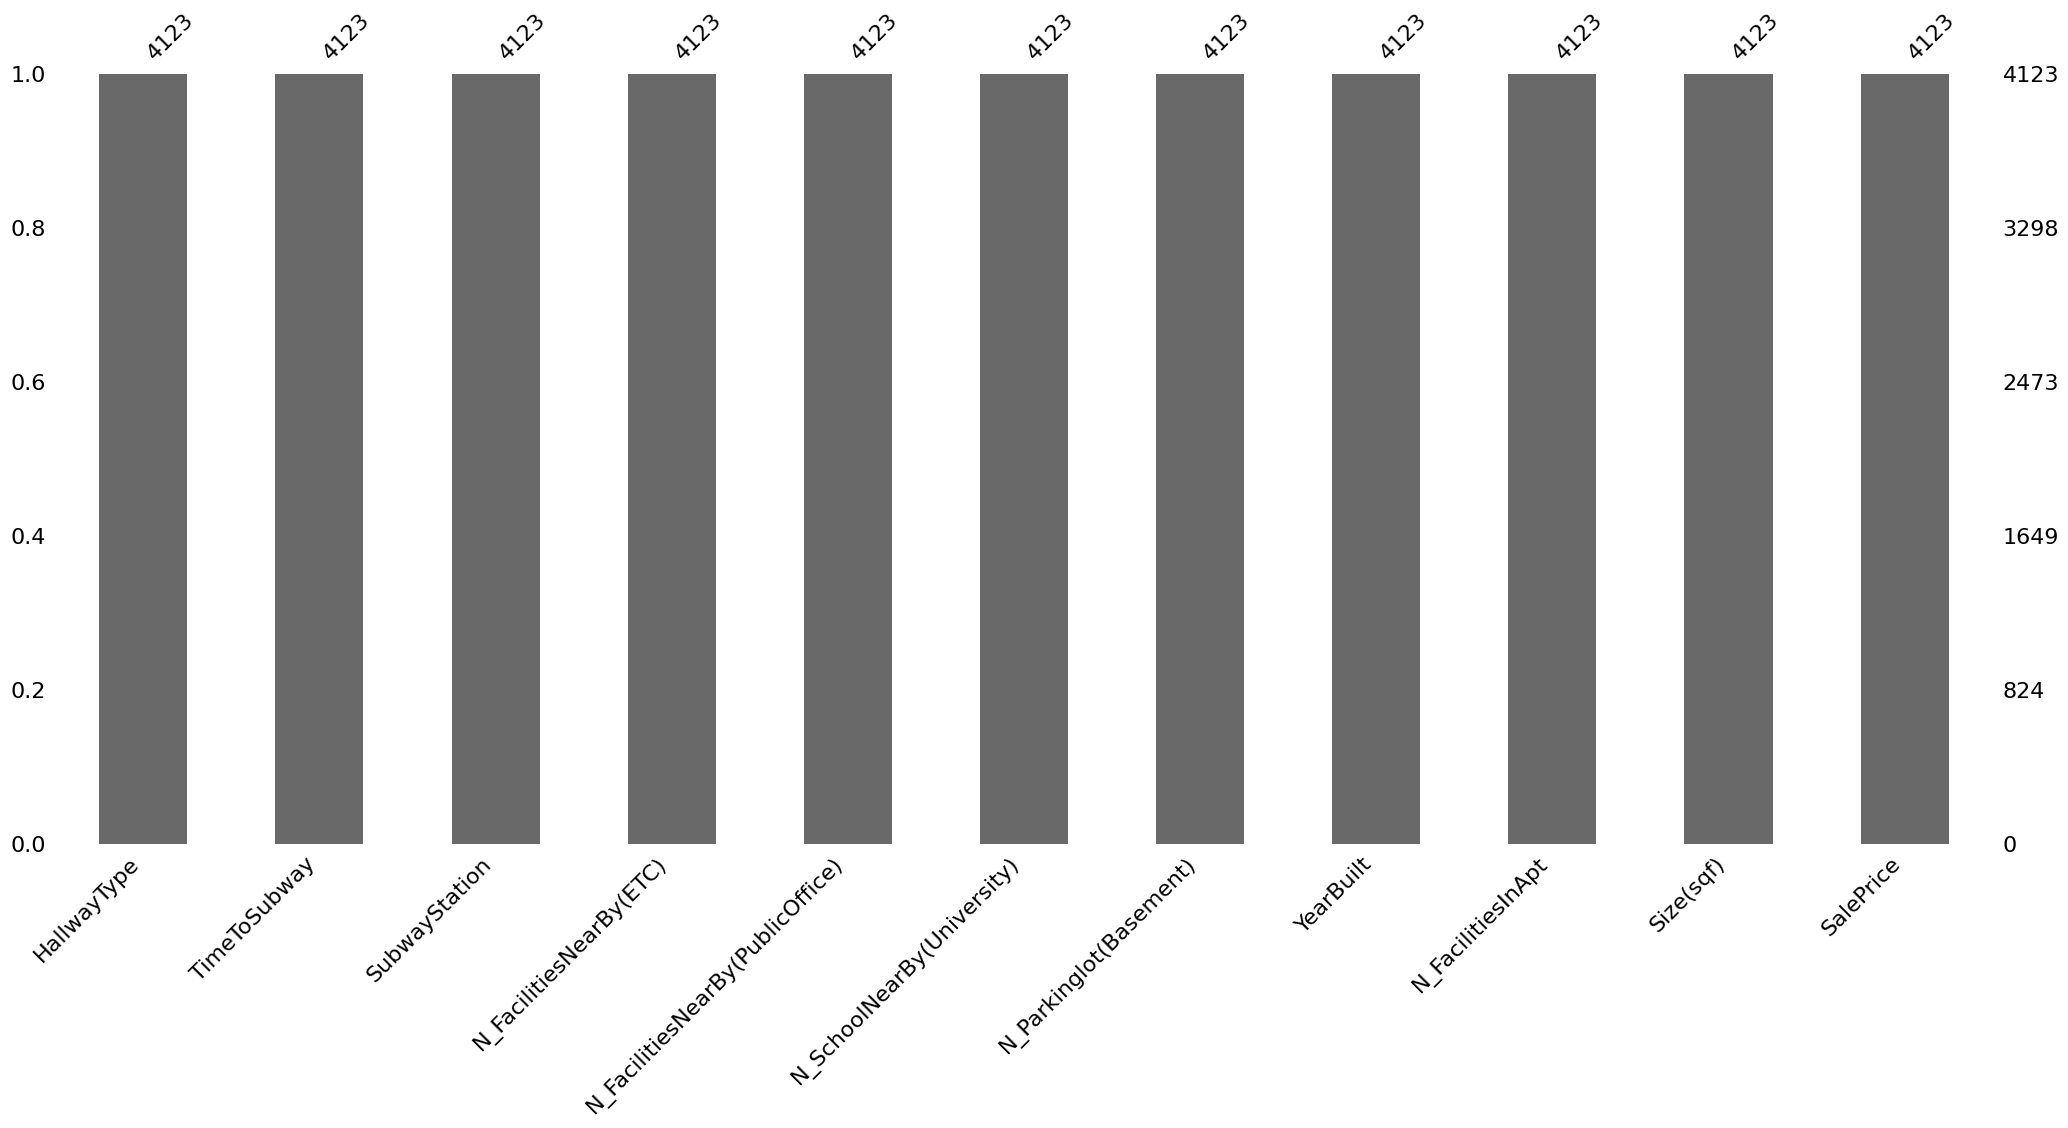

In [3]:
datas = []
for col in df.columns:
    datas.append([col, df[col].count(), df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2), df[col].nunique(), df[col].unique()])
    
df1 = pd.DataFrame(columns=['Columns','Count Data','Type','Null','%Null','Nunique','Unique'],data=datas)
display(df1,missingno.bar(df))

Based on dataframe and barplot above, there is no missing values and no datatype errors.

2. Check Duplicate Values

In [4]:
check_duplicate = df.duplicated().sum()
result = print(f'Duplicate :',check_duplicate)
display(result,df[df.duplicated].sample(10))

Duplicate : 1422


None

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2242,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,914,135398
1969,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,255442
3850,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,261061
3363,terraced,0-5min,Myung-duk,2.0,3.0,1.0,181.0,2006,4,903,168141
185,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,147761
2257,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,345132
2209,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,448672
3074,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,66814
3485,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,346902
2096,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1690,448672


Based on checking the duplicate data above, there are 1422 data that show duplicates, but if we look at the details in each column, especially column 'Price' and 'Size', it shows the different apartments. Therefore, my decision is not to remove the 1422 identifed duplicates data.

## EDA

In [5]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


Distribution Not Normal


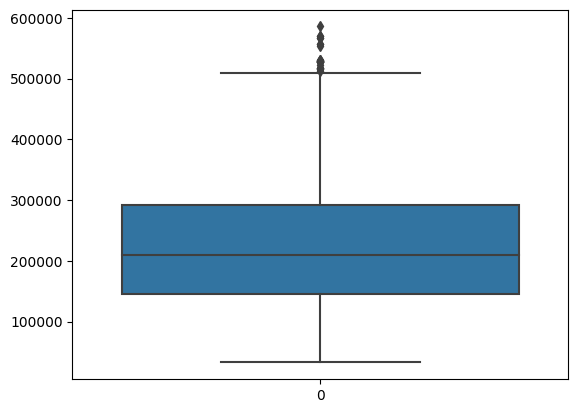

In [6]:
sns.boxplot(df['SalePrice'])

from scipy.stats import shapiro

statistic, p_value = shapiro(df['SalePrice'])

if p_value > 0.05:
    print("Distribution Normal")
else:
    print("Distribution Not Normal")


<Axes: >

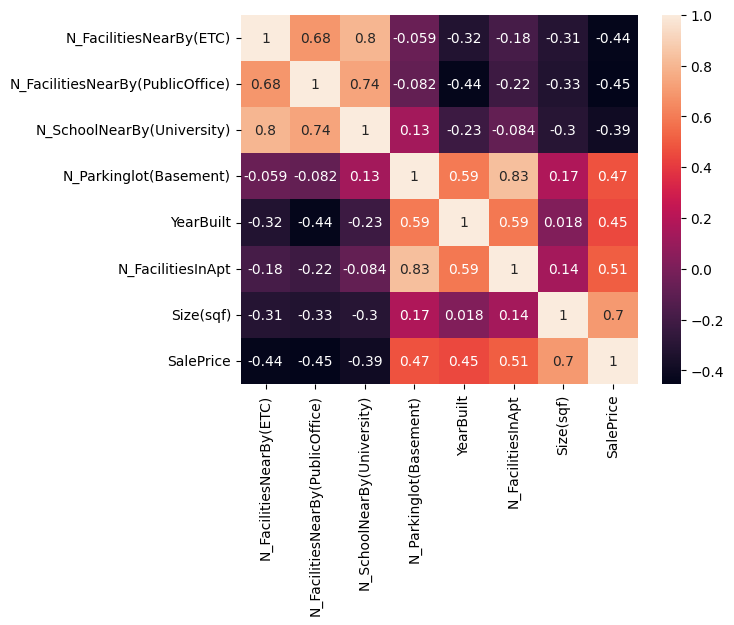

In [7]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

Based on describe, normality test, and heatmap. I got some insight, namely :

- The 'SalePrice' average is 221767.92 won, with the Oldest 'YearBuilt' is 1978 and the youngest is 2015.
- The Target 'SalePrice' is not normal distribution and the outlier value is above 500000 won 'SalePrice'.
- There is a strong negative correlation between Target 'SalePrice' with several features such as 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)' and 'N_SchoolNearBy(University)'. This indicates that the fewer facilities near the apartment, the more expensive the price will be. This may be due to the focus on apartment development in residential areas.

## Data Preprocessing - Feature Engineering 

1. Splitting dataset

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)


2. I want to perform feature encoding and scaling for categorical and numerical features in the dataset. Here's what I will do :

- Categorical
    -  I will encode the `HallwayType` column using OrdinalEncoding since the column has inherent order and has 3 unique values.
    -  I will encode the `TimeToSubway` column using OrdinalEncoding since the column has inherent order with time interval and has 5 unique values.
    -  I will encode the `SubwayStation` column using BinaryEncoding since the column has no inherent order and has 8 unique values. If I use One Hot Encoding, it will result in too many new columns, which can potentially lead to overfitting.

- Numerical
    -  I will scaling the `N_FacilitiesNearBy(ETC)` column using RobustScaler, considering its minimum value of 0 and maximum value of 5. In addition, RobustScaler ensures that the data maintains its order and not sensitive to outliers.
    - I will scaling the `N_FacilitiesNearBy(PublicOffice)` column using RobustScaler, considering its minimum value of 0 and maximum value of 7. In addition, RobustScaler ensures that the data maintains its order and not sensitive to outliers.
    - I will scaling the `N_SchoolNearBy(University)` column using RobustScaler, considering its minimum value of 0 and maximum value of 5. In addition, RobustScaler ensures that the data maintains its order and not sensitive to outliers.
    - I will scaling the `N_Parkinglot(Basement)` column using RobustScaler, considering its minimum value of 0 and maximum value of 1321. In addition, RobustScaler ensures that the data maintains its order and not sensitive to outliers.
    - I will scaling the `N_FacilitiesInApt` column using RobustScaler, considering its minimum value of 1 and maximum value of 10. In addition, RobustScaler ensures that the data maintains its order and not sensitive to outliers.
    - I will scaling the `Size(sqf)` column using RobustScaler, considering its minimum value of 135 and maximum value of 2337. In addition, RobustScaler ensures that the data maintains its order and not sensitive to outliers.
    - I will not scaling the `YearBuilt` column because that column it already has a clear interpretation and order or (homogeneous).

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, StandardScaler
import category_encoders as ce

ct = ColumnTransformer(transformers=[
    ("OrdinalEncoding",OrdinalEncoder(),['HallwayType','TimeToSubway']),
    ("BinaryEncoding",ce.BinaryEncoder(),['SubwayStation']),
    ("RobustScaler",RobustScaler(),['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)',
                                    'N_FacilitiesInApt','Size(sqf)'])],remainder='passthrough',verbose_feature_names_out=False)

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OrdinalEncoding', OrdinalEncoder(),
                                 ['HallwayType', 'TimeToSubway']),
                                ('BinaryEncoding', BinaryEncoder(),
                                 ['SubwayStation']),
                                ('RobustScaler', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'N_FacilitiesInApt',
                                  'Size(sqf)'])],
                  verbose_feature_names_out=False)

In [10]:
ord_cols = ct.named_transformers_['OrdinalEncoding'].get_feature_names_out()
bin_cols = ct.named_transformers_['BinaryEncoding'].get_feature_names_out()
reb_cols = ct.named_transformers_['RobustScaler'].get_feature_names_out()
all_cols = list(ord_cols) + list(bin_cols) + list(reb_cols) + ['YearBuilt']

In [11]:
X_train_pre = ct.fit_transform(X_train)
df_X_train_pre = pd.DataFrame(data=X_train_pre,columns=all_cols)
df_X_train_pre

,HallwayType,TimeToSubway,SubwayStation_0,SubwayStation_1,SubwayStation_2,SubwayStation_3,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),YearBuilt
0,1.0,2.0,0.0,0.0,0.0,1.0,0.8,0.5,1.5,0.000000,-0.333333,2.765504,1993.0
1,2.0,0.0,0.0,0.0,1.0,0.0,-0.2,-0.5,-0.5,0.112378,0.000000,0.821705,2007.0
2,1.0,2.0,0.0,0.0,0.0,1.0,0.8,0.5,1.5,0.000000,-0.333333,0.007752,1993.0
3,2.0,3.0,0.0,0.0,1.0,1.0,-0.2,-2.0,-0.5,1.278502,1.666667,-0.515504,2015.0
4,2.0,0.0,0.0,1.0,0.0,0.0,-0.2,-1.0,0.0,-0.099349,1.000000,-0.156977,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,0.0,3.0,0.0,0.0,1.0,0.0,-0.2,-1.0,0.0,-0.697068,-1.000000,-1.350775,2014.0
3294,0.0,3.0,0.0,0.0,1.0,0.0,-0.2,-1.0,0.0,-0.697068,-1.000000,-1.205426,2014.0
3295,1.0,3.0,0.0,1.0,0.0,1.0,0.8,0.0,1.0,0.426710,0.666667,0.007752,2005.0
3296,1.0,2.0,0.0,0.0,0.0,1.0,0.8,0.5,1.5,0.000000,-0.333333,0.732558,1993.0


## Model Benchmark

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import KFold,cross_val_score

In [13]:
lr = LinearRegression()
lg = LogisticRegression()
dtree = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
ab = AdaBoostRegressor(random_state=42)
svr = SVR()
xgb = XGBRegressor()
lgbm = LGBMRegressor(random_state=42)

models = [lr,lg,dtree,knn,rf,gb,ab,svr,xgb,lgbm]
name_models = ['LinearReg','LogisticReg','DTreeReg','KNNReg','RandomForestReg','GradientBoostingReg','AdaBoostReg','SVR','XGBReg','LGBMReg']

score_mae = []
score_mean_mae = []
score_std_mae = []

score_mape = []
score_mean_mape = []
score_std_mape = []

In [14]:
for model in models:
    crossval = KFold(n_splits=5,shuffle=True,random_state=42)
    estimator = Pipeline([
        ('ColumnTransform',ct),
        ('Model',model)
    ])
    estimator.fit(X_train,y_train)

    #MAE
    model_cv_mae = cross_val_score(estimator,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_error',error_score='raise')
    score_mae.append(model_cv_mae)
    score_mean_mae.append(model_cv_mae.mean())
    score_std_mae.append(model_cv_mae.std())

    #MAPE
    model_cv_mape = cross_val_score(estimator,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_percentage_error',error_score='raise')
    score_mape.append(model_cv_mape)
    score_mean_mape.append(model_cv_mape.mean())
    score_std_mape.append(model_cv_mape.std())

df_score_cval_mae = pd.DataFrame(data=score_mae,columns=['Iter MAE 1','Iter MAE 2','Iter MAE 3','Iter MAE 4','Iter MAE 5'],index=name_models).reset_index().rename(columns={'index':'Model'})
df_score_cval_mape = pd.DataFrame(data=score_mape,columns=['Iter MAPE 1','Iter MAPE 2','Iter MAPE 3','Iter MAPE 4','Iter MAPE 5'],index=name_models).reset_index().rename(columns={'index':'Model'})
pd.merge(df_score_cval_mae,df_score_cval_mape,on='Model')

,Model,Iter MAE 1,Iter MAE 2,Iter MAE 3,Iter MAE 4,Iter MAE 5,Iter MAPE 1,Iter MAPE 2,Iter MAPE 3,Iter MAPE 4,Iter MAPE 5
0,LinearReg,-42585.305092,-43427.757572,-41718.004214,-42800.462595,-42454.978810,-0.227685,-0.234986,-0.225114,-0.232176,-0.230352
1,LogisticReg,-64493.862121,-57198.221212,-60868.553030,-60076.397572,-63464.104704,-0.315613,-0.292784,-0.325077,-0.339677,-0.318908
2,DTreeReg,-35083.532868,-34531.026162,-34389.172922,-35233.351034,-34294.097917,-0.189278,-0.183043,-0.181851,-0.192595,-0.181190
3,KNNReg,-35444.123636,-36195.039394,-36561.350909,-37664.839757,-37634.890137,-0.191152,-0.192919,-0.194306,-0.212250,-0.207088
4,RandomForestReg,-34823.906033,-34499.257813,-34264.861456,-35246.234967,-34428.745620,-0.186732,-0.183057,-0.181034,-0.192953,-0.183542
5,GradientBoostingReg,-34708.549347,-34775.835462,-34283.443154,-35501.036483,-34580.459887,-0.184780,-0.185251,-0.182864,-0.195102,-0.183922
6,AdaBoostReg,-43478.710593,-41287.195754,-40616.517948,-42674.546897,-40310.899407,-0.254761,-0.241966,-0.248661,-0.275014,-0.253215
7,SVR,-89465.352846,-88323.745244,-86951.311635,-86483.299015,-86488.052735,-0.548839,-0.574160,-0.586854,-0.612513,-0.578723
8,XGBReg,-34886.793928,-34530.756457,-34388.448550,-35233.138070,-34261.108646,-0.187072,-0.183041,-0.181850,-0.192595,-0.181015
9,LGBMReg,-34578.477326,-34511.152799,-34342.868173,-35294.002561,-34461.253012,-0.184400,-0.182525,-0.181471,-0.192885,-0.182957


In [15]:
score_predict_mae = []
score_predict_mape = []

for model in models:
    estimator_pred = Pipeline([
        ("ColumnTransform",ct),
        ("Model", model)
    ])
    estimator_pred.fit(X_train,y_train)
    
    y_pred = estimator_pred.predict(X_test)
    score_predict_mae.append(mean_absolute_error(y_test,y_pred))
    score_predict_mape.append(mean_absolute_percentage_error(y_test,y_pred))


In [16]:
result_1 = pd.DataFrame({
    'Models' : name_models,
    'Mean MAE' : score_mean_mae,
    'Std MAE' : score_std_mae,
    'Mean MAPE' : score_mean_mape,
    'Std MAPE' : score_std_mape,
    'Predict MAE' : score_predict_mae,
    'Predict MAPE': score_predict_mape
})
result_1.loc[10] = result_1.mean()
result_1.loc[10,'Models'] = 'Average All'
result_1

,Models,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Predict MAE,Predict MAPE
0,LinearReg,-42597.301657,552.176620,-0.230063,0.003433,41241.515999,0.233850
1,LogisticReg,-61220.227728,2583.030196,-0.318412,0.015242,59374.786667,0.308716
2,DTreeReg,-34706.236181,379.812708,-0.185592,0.004528,32226.838869,0.178099
3,KNNReg,-36700.048767,855.145548,-0.199543,0.008486,35884.615273,0.199559
4,RandomForestReg,-34652.601178,348.055748,-0.185463,0.004167,32191.169178,0.178373
5,GradientBoostingReg,-34769.864866,402.712677,-0.186384,0.004434,32750.837787,0.181706
6,AdaBoostReg,-41673.574120,1215.236813,-0.254723,0.011077,40154.270350,0.248925
7,SVR,-87542.352295,1173.965632,-0.580218,0.020545,84621.170581,0.558794
8,XGBReg,-34660.049130,354.818578,-0.185115,0.004279,32225.977211,0.178096
9,LGBMReg,-34637.550774,337.139083,-0.184848,0.004127,32293.523079,0.180657


Based on dataframe above, 'LGBMRegressor' is the best model because the scores of 'Mean MAE', 'Std MAE', 'Mean MAPE', 'Std MAPE' are the lower than others models.

Next, i will conduct an experiment by changing the scaling method in several column to find out whether the model's score / result is better or not.

## Experiment : Re-Data Preprocessing & Feature Engineering

1. First Experiment, i will changing all numerical columns (except column 'YearBuilt') with StandarScaler method. Purpose of making all numerical columns approximate a normal distribution. 

In [17]:
ct_1 = ColumnTransformer(transformers=[
    ("OrdinalEncoding",OrdinalEncoder(),['HallwayType','TimeToSubway']),
    ("BinaryEncoding",ce.BinaryEncoder(),['SubwayStation']),
    ("StandarScaler",StandardScaler(),['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)',
                                    'N_FacilitiesInApt','Size(sqf)'])
],remainder='passthrough',verbose_feature_names_out=False)

ct_1.fit_transform(X_train)

array([[ 1.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -7.65842943e-01,  3.55383066e+00,  1.99300000e+03],
       [ 2.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.41275784e-01,  9.70847740e-01,  2.00700000e+03],
       [ 1.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -7.65842943e-01, -1.10760264e-01,  1.99300000e+03],
       ...,
       [ 1.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
         5.07858532e-01, -1.10760264e-01,  2.00500000e+03],
       [ 1.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -7.65842943e-01,  8.52385911e-01,  1.99300000e+03],
       [ 1.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
         5.07858532e-01,  5.84559167e-01,  2.00500000e+03]])

In [18]:
score_mae_1 = []
score_mean_mae_1 = []
score_std_mae_1 = []

score_mape_1 = []
score_mean_mape_1 = []
score_std_mape_1 = []

score_predict_mae_1 = []
score_predict_mape_1 = []

for model in models:
    crossval_1 = KFold(n_splits=5,shuffle=True,random_state=42)
    estimator_1 = Pipeline([
        ("ColumnTransform",ct_1),
        ("Models",model)
    ])
    estimator_1.fit(X_train,y_train)
    
    model_cv_mae_1 = cross_val_score(estimator_1,X_train,y_train,cv=crossval_1,scoring='neg_mean_absolute_error',error_score='raise')
    score_mae_1.append(model_cv_mae_1)
    score_mean_mae_1.append(model_cv_mae_1.mean())
    score_std_mae_1.append(model_cv_mae_1.std())
    
    model_cv_mape_1 = cross_val_score(estimator_1,X_train,y_train,cv=crossval_1,scoring='neg_mean_absolute_percentage_error',error_score='raise')
    score_mape_1.append(model_cv_mape_1)
    score_mean_mape_1.append(model_cv_mape_1.mean())
    score_std_mape_1.append(model_cv_mape_1.std())
    
for model in models:
    estimator_pred_1 = Pipeline([
        ("ColumnTransform",ct_1),
        ("Models",model)
    ])
    estimator_pred_1.fit(X_train,y_train)
    
    y_pred_1 = estimator_pred_1.predict(X_test)
    score_predict_mae_1.append(mean_absolute_error(y_test,y_pred_1))
    score_predict_mape_1.append(mean_absolute_percentage_error(y_test,y_pred_1))
    
exp_1 = pd.DataFrame({
    'Models' : name_models,
    'Mean MAE' : score_mean_mae_1,
    'Std MAE' : score_std_mae_1,
    'Mean MAPE' : score_mean_mape_1,
    'Std MAPE' : score_std_mape_1,
    'Predict MAE' : score_predict_mae_1,
    'Predict MAPE': score_predict_mape_1
})

exp_1.loc[10] = exp_1.mean()
exp_1.loc[10,'Models'] = 'Average All'

In [19]:
exp_1

,Models,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Predict MAE,Predict MAPE
0,LinearReg,-42597.301657,552.176620,-0.230063,0.003433,41241.515999,0.233850
1,LogisticReg,-58868.821377,1357.364775,-0.308615,0.012436,58824.507879,0.309798
2,DTreeReg,-34706.236181,379.812708,-0.185592,0.004528,32226.838869,0.178099
3,KNNReg,-36425.960847,1074.922829,-0.196816,0.008015,34846.714182,0.198280
4,RandomForestReg,-34653.079416,348.292360,-0.185469,0.004168,32191.169178,0.178373
5,GradientBoostingReg,-34770.751717,402.581533,-0.186393,0.004431,32750.837787,0.181706
6,AdaBoostReg,-41587.648749,1093.672322,-0.254872,0.011081,40154.270350,0.248925
7,SVR,-87542.351580,1173.965627,-0.580218,0.020545,84621.169729,0.558794
8,XGBReg,-34660.782009,355.289635,-0.185123,0.004283,32225.977211,0.178096
9,LGBMReg,-34637.550774,337.139083,-0.184848,0.004127,32293.523079,0.180657


2. Second Experiment, i wil check for outliers in all columns (except column 'YearBuilt'). If any column has outliers, i will use the RobustScaler method and the other columns that dont have outliers, i will use the StandarScaler method.

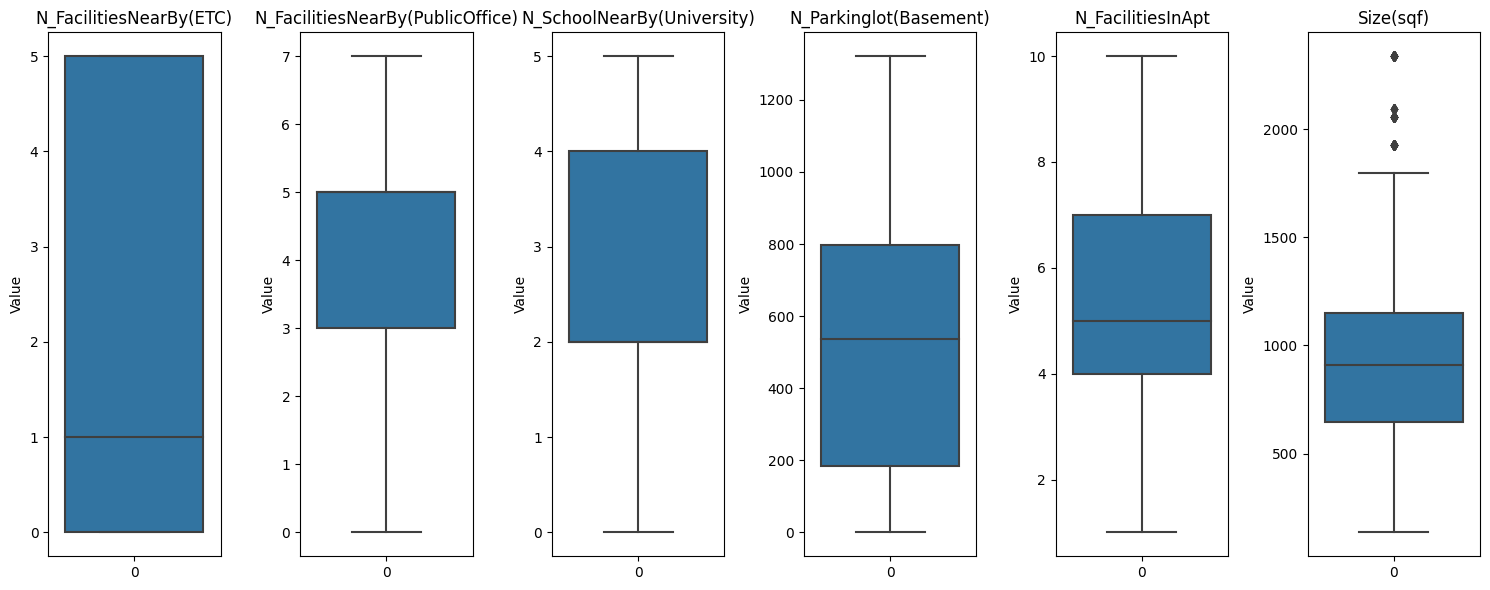

In [20]:
numerics = df[['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)',
                                    'N_FacilitiesInApt','Size(sqf)']]
fig, axs = plt.subplots(1, len(numerics.columns), figsize=(15, 6))
for i, col in enumerate(numerics.columns):
    sns.boxplot(data=numerics[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

Based on boxplot above, only column 'Size(sqf)' has outliers. So, i will use the RobustScaler method for 'Size(sqf)' and others using the StandarScaler method.

In [21]:
ct_2 = ColumnTransformer(transformers=[
    ("OrdinalEncoding",OrdinalEncoder(),['HallwayType','TimeToSubway']),
    ("BinaryEncoding",ce.BinaryEncoder(),['SubwayStation']),
    ("RobustScaler",RobustScaler(),['Size(sqf)']),
    ("StandarScaler",StandardScaler(),['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)',
                                    'N_FacilitiesInApt'])
],remainder='passthrough',verbose_feature_names_out=False)

ct_2.fit_transform(X_train)

array([[ 1.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -8.26391560e-02, -7.65842943e-01,  1.99300000e+03],
       [ 2.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.47785763e-02, -3.41275784e-01,  2.00700000e+03],
       [ 1.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -8.26391560e-02, -7.65842943e-01,  1.99300000e+03],
       ...,
       [ 1.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
         5.53062958e-01,  5.07858532e-01,  2.00500000e+03],
       [ 1.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -8.26391560e-02, -7.65842943e-01,  1.99300000e+03],
       [ 1.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
         5.53062958e-01,  5.07858532e-01,  2.00500000e+03]])

In [22]:
score_mae_2 = []
score_mean_mae_2 = []
score_std_mae_2 = []

score_mape_2 = []
score_mean_mape_2 = []
score_std_mape_2 = []

score_predict_mae_2 = []
score_predict_mape_2 = []

for model in models:
    crossval_2 = KFold(n_splits=5,shuffle=True,random_state=42)
    estimator_2 = Pipeline([
        ("ColumnTransform",ct_2),
        ("Models",model)
    ])
    estimator_2.fit(X_train,y_train)
    
    model_cv_mae_2 = cross_val_score(estimator_2,X_train,y_train,cv=crossval_2,scoring='neg_mean_absolute_error',error_score='raise')
    score_mae_2.append(model_cv_mae_2)
    score_mean_mae_2.append(model_cv_mae_2.mean())
    score_std_mae_2.append(model_cv_mae_2.std())
    
    model_cv_mape_2 = cross_val_score(estimator_2,X_train,y_train,cv=crossval_2,scoring='neg_mean_absolute_percentage_error',error_score='raise')
    score_mape_2.append(model_cv_mape_2)
    score_mean_mape_2.append(model_cv_mape_2.mean())
    score_std_mape_2.append(model_cv_mape_2.std())
    
for model in models:
    estimator_pred_2 = Pipeline([
        ("ColumnTransform",ct_2),
        ("Models",model)
    ])
    estimator_pred_2.fit(X_train,y_train)
    
    y_pred_2 = estimator_pred_2.predict(X_test)
    score_predict_mae_2.append(mean_absolute_error(y_test,y_pred_2))
    score_predict_mape_2.append(mean_absolute_percentage_error(y_test,y_pred_2))
    
exp_2 = pd.DataFrame({
    'Models' : name_models,
    'Mean MAE' : score_mean_mae_2,
    'Std MAE' : score_std_mae_2,
    'Mean MAPE' : score_mean_mape_2,
    'Std MAPE' : score_std_mape_2,
    'Predict MAE' : score_predict_mae_2,
    'Predict MAPE': score_predict_mape_2
})
    
exp_2.loc[10] = exp_2.mean()
exp_2.loc[10, 'Models'] = 'Average All'
exp_2

,Models,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Predict MAE,Predict MAPE
0,LinearReg,-42597.301657,552.176620,-0.230063,0.003433,41241.515999,0.233850
1,LogisticReg,-59922.455907,1860.794175,-0.314716,0.013417,59622.580606,0.314257
2,DTreeReg,-34706.236181,379.812708,-0.185592,0.004528,32226.838869,0.178099
3,KNNReg,-36411.206037,903.543759,-0.196729,0.007723,34838.713455,0.197656
4,RandomForestReg,-34639.917754,343.700354,-0.185372,0.004121,32189.818076,0.178359
5,GradientBoostingReg,-34777.732778,401.821187,-0.186477,0.004404,32750.837787,0.181706
6,AdaBoostReg,-41587.648749,1093.672322,-0.254872,0.011081,40154.270350,0.248925
7,SVR,-87542.351759,1173.965622,-0.580218,0.020545,84621.169929,0.558794
8,XGBReg,-34660.049130,354.818578,-0.185115,0.004279,32225.977211,0.178096
9,LGBMReg,-34637.597164,337.130967,-0.184848,0.004127,32293.523079,0.180657


After doing 2 experiments, I will compare the results between the first results, experiment 1 and experiment 2.

In [23]:
display("First Result",result_1,"Result Experiment 1",exp_1,"Result Experiment 2",exp_2)

'First Result'

,Models,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Predict MAE,Predict MAPE
0,LinearReg,-42597.301657,552.176620,-0.230063,0.003433,41241.515999,0.233850
1,LogisticReg,-61220.227728,2583.030196,-0.318412,0.015242,59374.786667,0.308716
2,DTreeReg,-34706.236181,379.812708,-0.185592,0.004528,32226.838869,0.178099
3,KNNReg,-36700.048767,855.145548,-0.199543,0.008486,35884.615273,0.199559
4,RandomForestReg,-34652.601178,348.055748,-0.185463,0.004167,32191.169178,0.178373
5,GradientBoostingReg,-34769.864866,402.712677,-0.186384,0.004434,32750.837787,0.181706
6,AdaBoostReg,-41673.574120,1215.236813,-0.254723,0.011077,40154.270350,0.248925
7,SVR,-87542.352295,1173.965632,-0.580218,0.020545,84621.170581,0.558794
8,XGBReg,-34660.049130,354.818578,-0.185115,0.004279,32225.977211,0.178096
9,LGBMReg,-34637.550774,337.139083,-0.184848,0.004127,32293.523079,0.180657


'Result Experiment 1'

,Models,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Predict MAE,Predict MAPE
0,LinearReg,-42597.301657,552.176620,-0.230063,0.003433,41241.515999,0.233850
1,LogisticReg,-58868.821377,1357.364775,-0.308615,0.012436,58824.507879,0.309798
2,DTreeReg,-34706.236181,379.812708,-0.185592,0.004528,32226.838869,0.178099
3,KNNReg,-36425.960847,1074.922829,-0.196816,0.008015,34846.714182,0.198280
4,RandomForestReg,-34653.079416,348.292360,-0.185469,0.004168,32191.169178,0.178373
5,GradientBoostingReg,-34770.751717,402.581533,-0.186393,0.004431,32750.837787,0.181706
6,AdaBoostReg,-41587.648749,1093.672322,-0.254872,0.011081,40154.270350,0.248925
7,SVR,-87542.351580,1173.965627,-0.580218,0.020545,84621.169729,0.558794
8,XGBReg,-34660.782009,355.289635,-0.185123,0.004283,32225.977211,0.178096
9,LGBMReg,-34637.550774,337.139083,-0.184848,0.004127,32293.523079,0.180657


'Result Experiment 2'

,Models,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Predict MAE,Predict MAPE
0,LinearReg,-42597.301657,552.176620,-0.230063,0.003433,41241.515999,0.233850
1,LogisticReg,-59922.455907,1860.794175,-0.314716,0.013417,59622.580606,0.314257
2,DTreeReg,-34706.236181,379.812708,-0.185592,0.004528,32226.838869,0.178099
3,KNNReg,-36411.206037,903.543759,-0.196729,0.007723,34838.713455,0.197656
4,RandomForestReg,-34639.917754,343.700354,-0.185372,0.004121,32189.818076,0.178359
5,GradientBoostingReg,-34777.732778,401.821187,-0.186477,0.004404,32750.837787,0.181706
6,AdaBoostReg,-41587.648749,1093.672322,-0.254872,0.011081,40154.270350,0.248925
7,SVR,-87542.351759,1173.965622,-0.580218,0.020545,84621.169929,0.558794
8,XGBReg,-34660.049130,354.818578,-0.185115,0.004279,32225.977211,0.178096
9,LGBMReg,-34637.597164,337.130967,-0.184848,0.004127,32293.523079,0.180657


Based on dataframes above, i decided to use the 'Result Experiment 1' (ct_1) and the LGBMRegressor model for the following reasons :
- 'Result Experiment 1' had a lower 'Average All' than 'First Result' and 'Result Experiment 2' in scores of 'Mean MAE', 'Std MAE', 'Mean MAPE' and 'Std MAPE'.
- In the 'Result Experiment 1' dataframe, LGBMRegressor has lower 'Mean MAE' and 'Mean MAPE' scores than others model. It indicate that the model has good performance for estimating or predicting with a low error rate.
- In the 'Result Experiment 1' dataframe, LGBMRegressor has lower 'Std MAE' and 'Std MAPE' scores than others model. It indicate that the model has a smaller level of variance and a better level of consistency.


## Hyperparameter Tunning

In [24]:
from sklearn.model_selection import GridSearchCV

estimator_fix = Pipeline([
    ("ColumnTransform", ct_1),
    ("Model", LGBMRegressor())
])

param_space = {
    'Model__n_estimators': [50,100,150,200,300],
    'Model__learning_rate': [0.5,0.05,0.1,0.01,0.001],
    'Model__max_depth': [-1,5,10,20,30],
    'Model__num_leaves': [20,30,40,50],
    'Model__random_state': [42,1,2020]
}

grid_search = GridSearchCV(estimator_fix, param_grid=param_space, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], n_jobs=-1, refit='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ColumnTransform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OrdinalEncoding',
                                                                         OrdinalEncoder(),
                                                                         ['HallwayType',
                                                                          'TimeToSubway']),
                                                                        ('BinaryEncoding',
                                                                         BinaryEncoder(),
                                                                         ['SubwayStation']),
                                                                        ('StandarScaler',
                                                                         StandardScaler(),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_F...
                                       ('Model', LGBMRegressor())]),
             n_jobs=-1,
             param_grid={'Model__learning_rate': [0.5, 0.05, 0.1, 0.01, 0.001],
                         'Model__max_depth': [-1, 5, 10, 20, 30],
                         'Model__n_estimators': [50, 100, 150, 200, 300],
                         'Model__num_leaves': [20, 30, 40, 50],
                         'Model__random_state': [42, 1, 2020]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [25]:
best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train,y_train)

Pipeline(steps=[('ColumnTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(),
                                                  ['SubwayStation']),
                                                 ('StandarScaler',
                                                  StandardScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)'])],
                                   verbose_feature_names_out=False)),
                ('Model',
                 LGBMRegressor(max_depth=5, n_estimators=300, num_leaves=20,
                               random_state=42))])

In [26]:
estimator_fix.fit(X_train,y_train)

Pipeline(steps=[('ColumnTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(),
                                                  ['SubwayStation']),
                                                 ('StandarScaler',
                                                  StandardScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)'])],
                                   verbose_feature_names_out=False)),
                ('Model', LGBMRegressor())])

In [27]:
#Tunned
y_pred_best_estimator = best_estimator.predict(X_test)
mae_pred_tunned = mean_absolute_error(y_test,y_pred_best_estimator)
mape_pred_tunned = mean_absolute_percentage_error(y_test,y_pred_best_estimator)

#Default
y_pred_estimator_fix = estimator_fix.predict(X_test)
mae_pred_default = mean_absolute_error(y_test,y_pred_estimator_fix)
mape_pred_default = mean_absolute_percentage_error(y_test,y_pred_estimator_fix)

df_tunned_default = pd.DataFrame({
    'Model' : ['LGBM Default', 'LGBM Tunned'],
    'Score MAE' : [mae_pred_default,mae_pred_tunned],
    'Score MAPE' : [mape_pred_default,mape_pred_tunned]
})

df_tunned_default

,Model,Score MAE,Score MAPE
0,LGBM Default,32293.523079,0.180657
1,LGBM Tunned,32240.214011,0.179605


Based on dataframe above, after tunning the model experienced an increase in performance with the 'Score MAE' and 'Score MAPE' lower than the default.

Scatter Plot : Actual vs Prediction Price

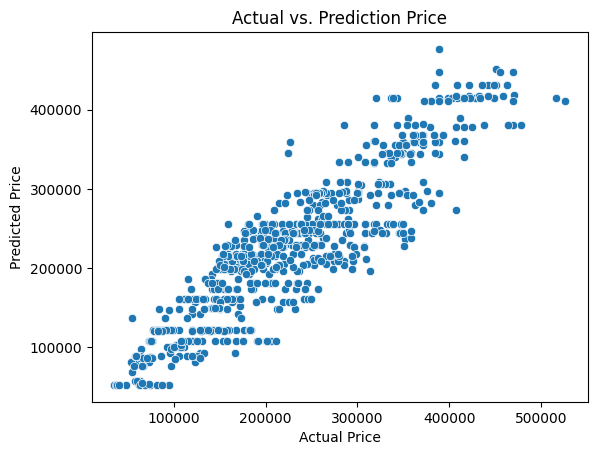

In [28]:
sns.scatterplot(x=y_test, y=y_pred_best_estimator).set(title='Actual vs. Prediction Price', xlabel='Actual Price', ylabel='Predicted Price');

Bar Plot Feature Importances

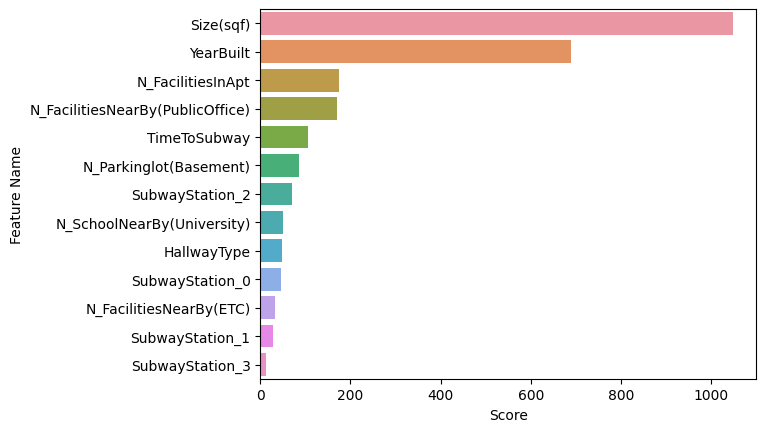

In [29]:
column_transform = best_estimator.named_steps['ColumnTransform']
OrdinalEncoding = column_transform.named_transformers_["OrdinalEncoding"].get_feature_names_out()
BinaryEncoding = column_transform.named_transformers_["BinaryEncoding"].get_feature_names_out()
StandarScaler = column_transform.named_transformers_["StandarScaler"].get_feature_names_out()
all_cols_1 = list(OrdinalEncoding) + list(BinaryEncoding) + list(StandarScaler) + ["YearBuilt"]
score = best_estimator["Model"].feature_importances_
feature_score = list(zip(all_cols_1,score))
feature_importance = pd.DataFrame(data=feature_score,columns=['Feature Name','Score']).sort_values(by='Score',ascending=False)
sns.barplot(x=feature_importance['Score'],y=feature_importance['Feature Name'],orient='h')
plt.show()

SHAP Plot Summary

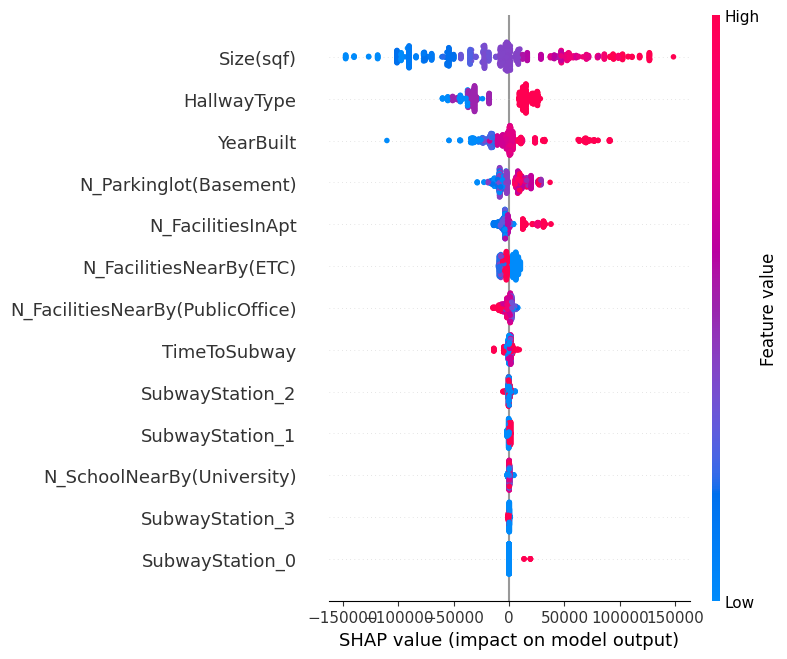

In [30]:
np.bool = np.bool_
import shap

model = best_estimator['Model']
x_test_transform = best_estimator.named_steps["ColumnTransform"].transform(X_test)
explainer = shap.TreeExplainer(model,data=x_test_transform,feature_perturbation="interventional")
shap_values = explainer.shap_values(x_test_transform)
shap.summary_plot(shap_values,x_test_transform,feature_names=all_cols_1)

## Conclusions

Based on Scatter Plot, Bar Plot of Feature Importance, and SHAP Summary Plot, I have drawn the following conclusions :
- Scatter Plot: In the scatter plot, there are some data points where the predicted values are higher than the actual values, and vice versa. This indicates that the model's price predictions may deviate or have an error of 17.9% (MAPE). The 17.9% error could be attributed to the lack of features that represent apartment details, such as the number of rooms and distance (in meters/kilometers) to various public facilities around the apartment.

- Bar Plot of Feature Importance: The bar plot shows that there are two features, namely 'Size(sqf)' and 'YearBuilt', that significantly influence the 'SalePrice' prediction.

- SHAP Summary Plot: In the SHAP summary plot, it is observed that as the values of the 'Size(sqf)', 'HallwayType', 'YearBuilt', and 'N_Parkinglot(Basement)' features increase, the predicted apartment prices also tend to increase. On the other hand, if these four features have low values, the predicted apartment prices tend to be lower.

- The apartment owner can determine the best selling price by setting the minimum price range from the actual 'SalePrice' and the maximum price from the predicted 'SalePrice' with an error rate of 17.9%.

## Recommendations

- If possible, adding new features that can provide a more detailed representation of the apartment, such as the number of rooms and the distance (in meters/kilometers) to various nearby public facilities.

- Grouping prediction results that experience underestimation and overestimation. Then analyze which data has extreme underestimation and overestimation values ​​and the reasons why extreme underestimation and overestimation occur.

- If there is additional data and a large number of features, you might explore using models that can handle more complex data, such as Neural Network or Recursive Neural Network.